<a href="https://colab.research.google.com/github/sayantan16/Deep-Learning-Tensorflow/blob/main/photo_culling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Mount Google Drive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, EfficientNetB0
from tensorflow.keras import layers, models, optimizers

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load and Prepare Dataset

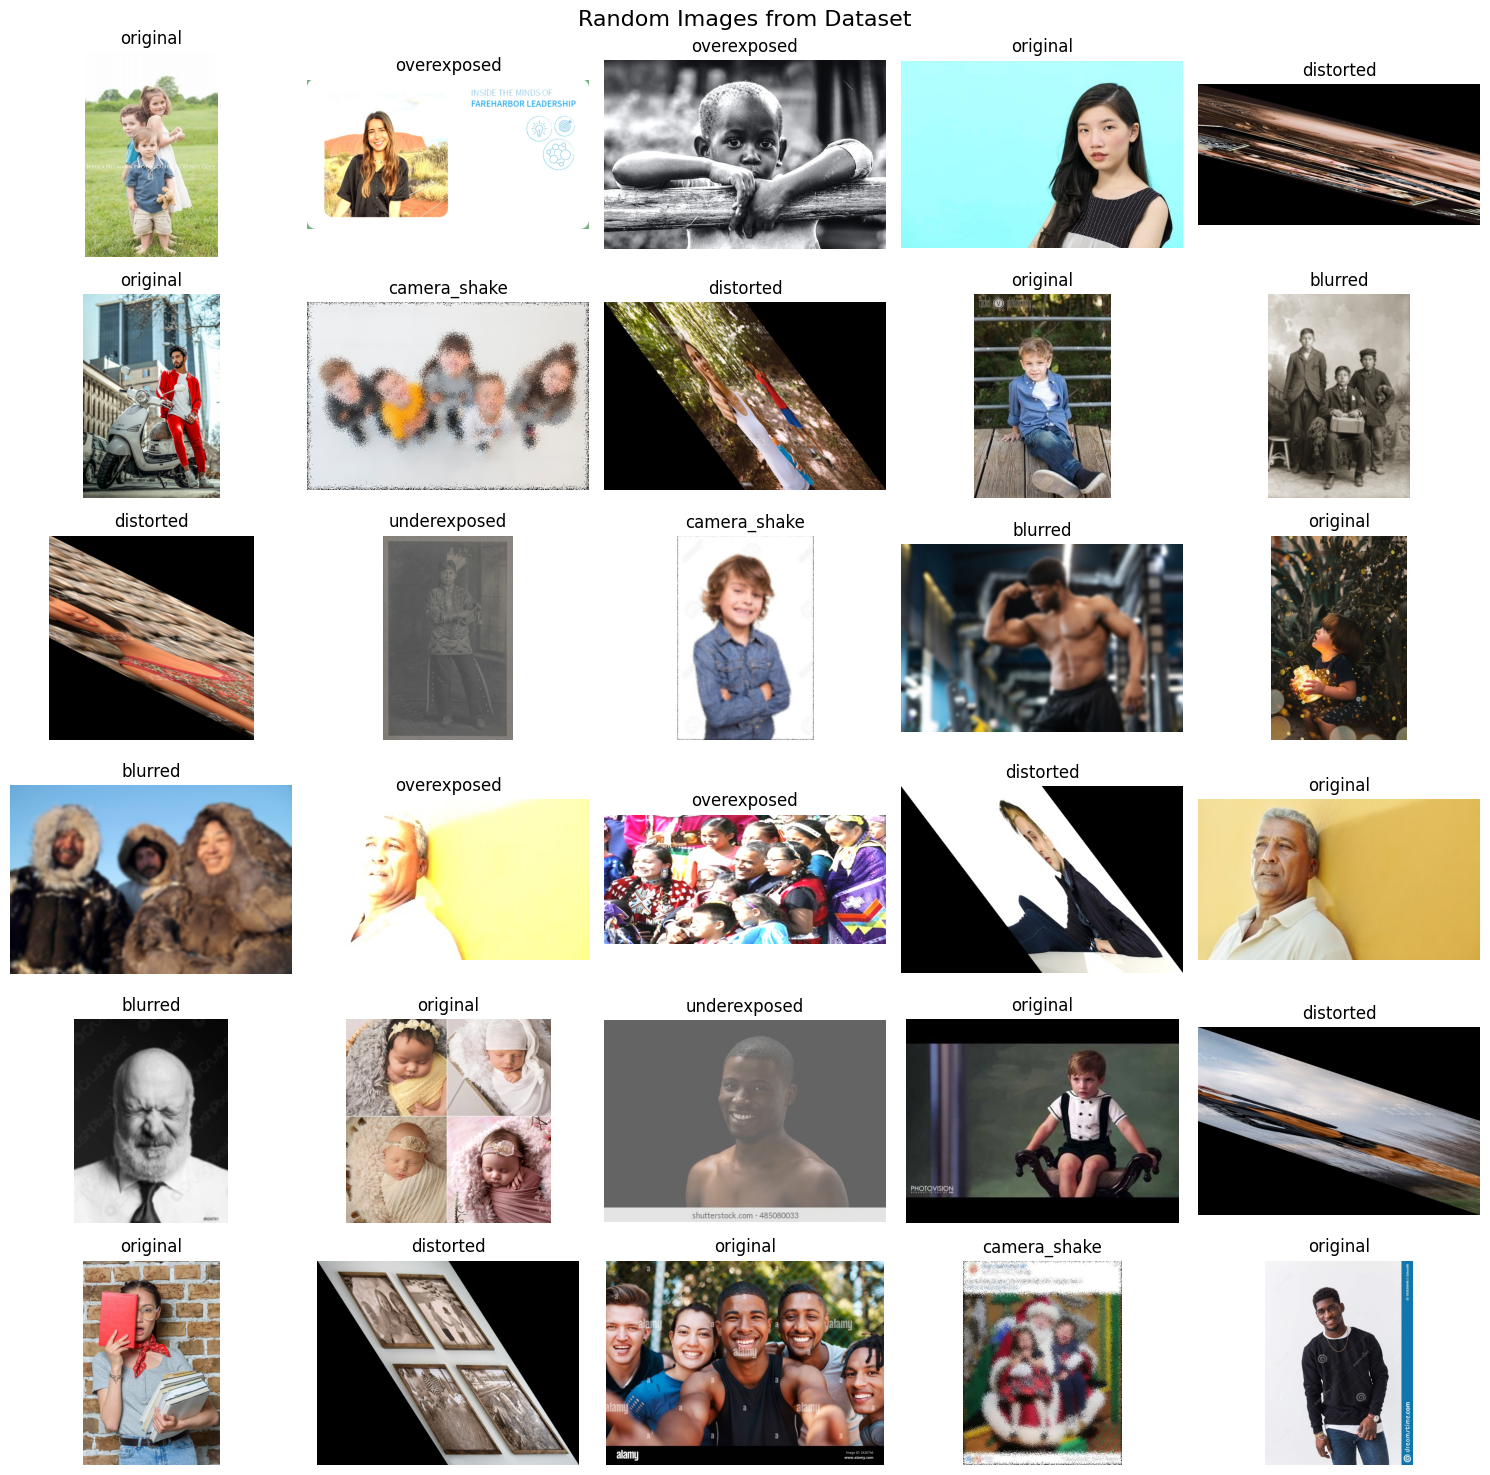

Found 1075 validated image filenames belonging to 6 classes.
Found 269 validated image filenames belonging to 6 classes.
Found 336 validated image filenames belonging to 6 classes.


In [2]:
# Load dataset.csv
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/dataset.csv')

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Split the dataset into train, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Display random images with labels
def display_random_images(dataframe, title):
    fig, axes = plt.subplots(6, 5, figsize=(15, 15))
    axes = axes.ravel()
    random_indices = random.sample(range(len(dataframe)), 30)  # Select 30 random images
    for i, index in enumerate(random_indices):
        img_path = dataframe.iloc[index]['X']
        img_label = dataframe.iloc[index]['Y']
        img = plt.imread(img_path)
        axes[i].imshow(img)
        axes[i].set_title(img_label)
        axes[i].axis('off')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

display_random_images(df, 'Random Images from Dataset')

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='X',
    y_col='Y',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='X',
    y_col='Y',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='X',
    y_col='Y',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load Pre-trained VGG16 Model and Modify Layers for Fine-tuning

Epoch 1/10
34/34 [==============================] - 26s 650ms/step - loss: 1.3894 - accuracy: 0.4400 - val_loss: 0.8890 - val_accuracy: 0.6468
Epoch 2/10
34/34 [==============================] - 23s 655ms/step - loss: 0.7078 - accuracy: 0.7191 - val_loss: 0.8276 - val_accuracy: 0.6840
Epoch 3/10
34/34 [==============================] - 23s 657ms/step - loss: 0.6753 - accuracy: 0.7479 - val_loss: 0.5867 - val_accuracy: 0.7955
Epoch 4/10
34/34 [==============================] - 22s 653ms/step - loss: 0.4274 - accuracy: 0.8456 - val_loss: 0.6385 - val_accuracy: 0.7770
Epoch 5/10
34/34 [==============================] - 22s 648ms/step - loss: 0.3411 - accuracy: 0.8791 - val_loss: 0.5951 - val_accuracy: 0.8253
Epoch 6/10
34/34 [==============================] - 23s 679ms/step - loss: 0.2481 - accuracy: 0.9191 - val_loss: 0.4436 - val_accuracy: 0.8699
Epoch 7/10
34/34 [==============================] - 23s 670ms/step - loss: 0.3246 - accuracy: 0.8847 - val_loss: 0.2218 - val_accuracy: 0.9071

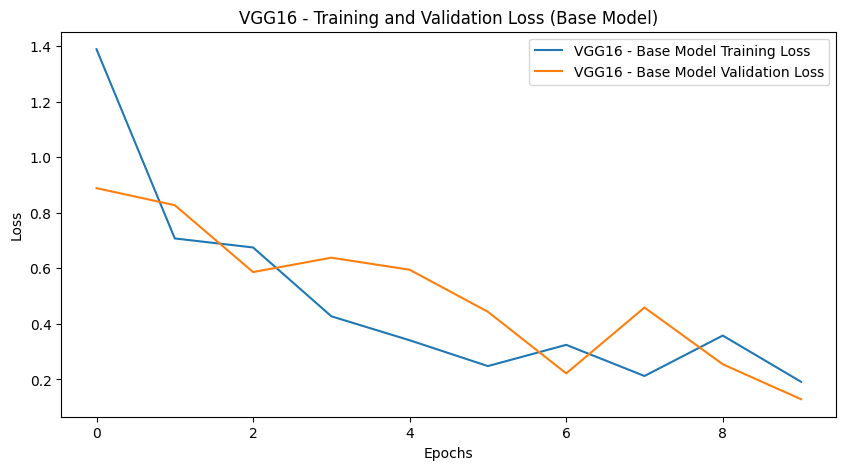

Epoch 1/10
34/34 [==============================] - 27s 681ms/step - loss: 0.9794 - accuracy: 0.6028 - val_loss: 0.4291 - val_accuracy: 0.8216
Epoch 2/10
34/34 [==============================] - 22s 644ms/step - loss: 0.6323 - accuracy: 0.7451 - val_loss: 0.3663 - val_accuracy: 0.8699
Epoch 3/10
34/34 [==============================] - 23s 665ms/step - loss: 0.6233 - accuracy: 0.7563 - val_loss: 0.3463 - val_accuracy: 0.8141
Epoch 4/10
34/34 [==============================] - 23s 664ms/step - loss: 0.3519 - accuracy: 0.8856 - val_loss: 0.2224 - val_accuracy: 0.9219
Epoch 5/10
34/34 [==============================] - 23s 666ms/step - loss: 0.2458 - accuracy: 0.9274 - val_loss: 0.3555 - val_accuracy: 0.9033
Epoch 6/10
34/34 [==============================] - 23s 669ms/step - loss: 0.2039 - accuracy: 0.9377 - val_loss: 0.7248 - val_accuracy: 0.8327
Epoch 7/10
34/34 [==============================] - 23s 669ms/step - loss: 0.3397 - accuracy: 0.8726 - val_loss: 0.4801 - val_accuracy: 0.8030

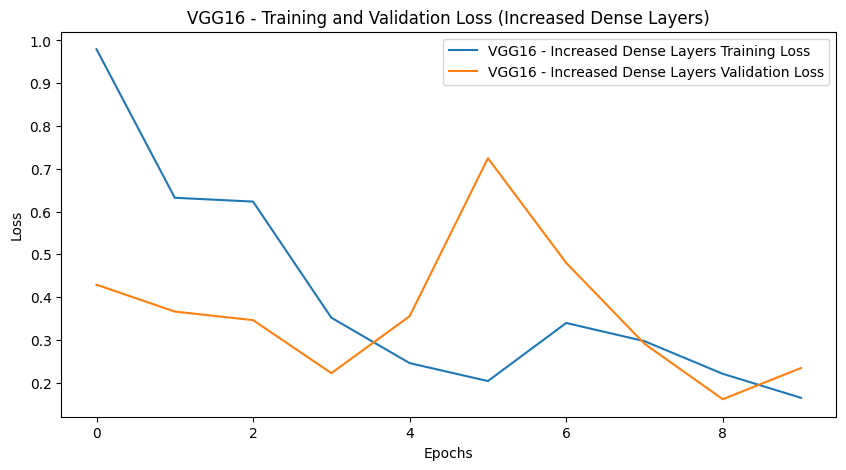

Epoch 1/10
34/34 [==============================] - 27s 668ms/step - loss: 0.7499 - accuracy: 0.7544 - val_loss: 0.4546 - val_accuracy: 0.8922
Epoch 2/10
34/34 [==============================] - 23s 669ms/step - loss: 0.2935 - accuracy: 0.9181 - val_loss: 0.3499 - val_accuracy: 0.9033
Epoch 3/10
34/34 [==============================] - 23s 666ms/step - loss: 0.2886 - accuracy: 0.9107 - val_loss: 0.2779 - val_accuracy: 0.9108
Epoch 4/10
34/34 [==============================] - 24s 688ms/step - loss: 0.1154 - accuracy: 0.9609 - val_loss: 0.2269 - val_accuracy: 0.9442
Epoch 5/10
34/34 [==============================] - 23s 668ms/step - loss: 0.0840 - accuracy: 0.9730 - val_loss: 0.2042 - val_accuracy: 0.9405
Epoch 6/10
34/34 [==============================] - 23s 661ms/step - loss: 0.0695 - accuracy: 0.9758 - val_loss: 0.2062 - val_accuracy: 0.9591
Epoch 7/10
34/34 [==============================] - 23s 661ms/step - loss: 0.0874 - accuracy: 0.9758 - val_loss: 0.1530 - val_accuracy: 0.9517

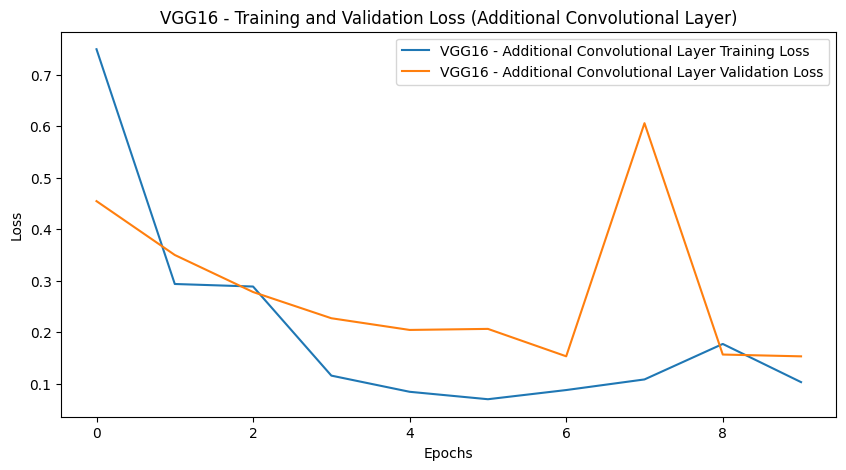

Epoch 1/10
34/34 [==============================] - 26s 659ms/step - loss: 0.3573 - accuracy: 0.8967 - val_loss: 0.2246 - val_accuracy: 0.9517
Epoch 2/10
34/34 [==============================] - 23s 670ms/step - loss: 0.1286 - accuracy: 0.9628 - val_loss: 0.3312 - val_accuracy: 0.9405
Epoch 3/10
34/34 [==============================] - 23s 675ms/step - loss: 0.0805 - accuracy: 0.9795 - val_loss: 0.2678 - val_accuracy: 0.9145
Epoch 4/10
34/34 [==============================] - 23s 670ms/step - loss: 0.1232 - accuracy: 0.9581 - val_loss: 0.1930 - val_accuracy: 0.9554
Epoch 5/10
34/34 [==============================] - 23s 659ms/step - loss: 0.1596 - accuracy: 0.9591 - val_loss: 0.3731 - val_accuracy: 0.9145
Epoch 6/10
34/34 [==============================] - 23s 665ms/step - loss: 0.1370 - accuracy: 0.9544 - val_loss: 0.0972 - val_accuracy: 0.9777
Epoch 7/10
34/34 [==============================] - 23s 652ms/step - loss: 0.0533 - accuracy: 0.9842 - val_loss: 0.2292 - val_accuracy: 0.9331

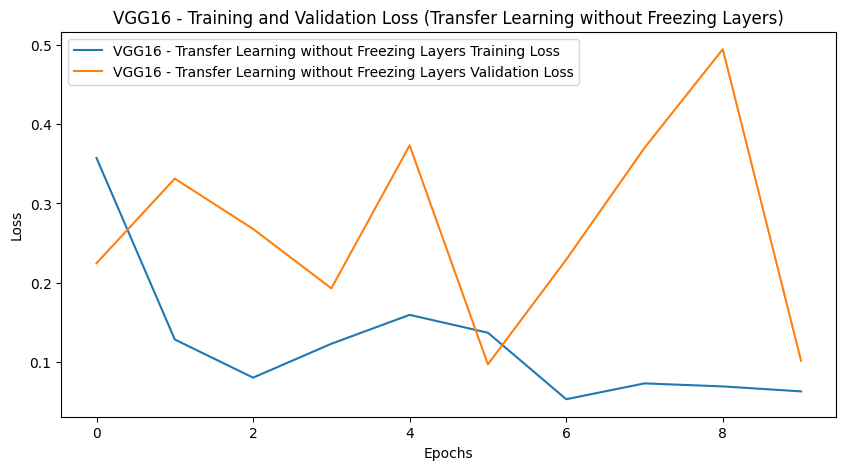

Epoch 1/10
34/34 [==============================] - 53s 683ms/step - loss: 1.5386 - accuracy: 0.4140 - val_loss: 2.0026 - val_accuracy: 0.1227
Epoch 2/10
34/34 [==============================] - 23s 660ms/step - loss: 0.8909 - accuracy: 0.7414 - val_loss: 2.0332 - val_accuracy: 0.1375
Epoch 3/10
34/34 [==============================] - 23s 659ms/step - loss: 0.5202 - accuracy: 0.8437 - val_loss: 1.9759 - val_accuracy: 0.1375
Epoch 4/10
34/34 [==============================] - 23s 660ms/step - loss: 0.3304 - accuracy: 0.8977 - val_loss: 1.9814 - val_accuracy: 0.1301
Epoch 5/10
34/34 [==============================] - 23s 668ms/step - loss: 0.2084 - accuracy: 0.9395 - val_loss: 1.9534 - val_accuracy: 0.0967
Epoch 6/10
34/34 [==============================] - 23s 662ms/step - loss: 0.1590 - accuracy: 0.9535 - val_loss: 1.9425 - val_accuracy: 0.0743
Epoch 7/10
34/34 [==============================] - 23s 661ms/step - loss: 0.1336 - accuracy: 0.9712 - val_loss: 1.9312 - val_accuracy: 0.1599

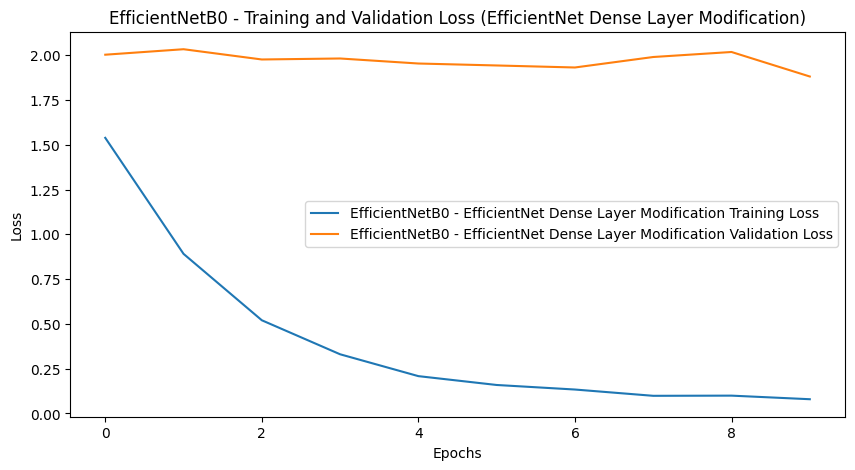

Epoch 1/10
34/34 [==============================] - 51s 674ms/step - loss: 0.9864 - accuracy: 0.6837 - val_loss: 1.8454 - val_accuracy: 0.3680
Epoch 2/10
34/34 [==============================] - 23s 665ms/step - loss: 0.2729 - accuracy: 0.9377 - val_loss: 1.7551 - val_accuracy: 0.4312
Epoch 3/10
34/34 [==============================] - 23s 668ms/step - loss: 0.1498 - accuracy: 0.9702 - val_loss: 1.8978 - val_accuracy: 0.2974
Epoch 4/10
34/34 [==============================] - 22s 654ms/step - loss: 0.1384 - accuracy: 0.9656 - val_loss: 1.6170 - val_accuracy: 0.4126
Epoch 5/10
34/34 [==============================] - 23s 667ms/step - loss: 0.1102 - accuracy: 0.9758 - val_loss: 1.4212 - val_accuracy: 0.5093
Epoch 6/10
34/34 [==============================] - 23s 651ms/step - loss: 0.0633 - accuracy: 0.9823 - val_loss: 1.2411 - val_accuracy: 0.6431
Epoch 7/10
34/34 [==============================] - 22s 653ms/step - loss: 0.0760 - accuracy: 0.9767 - val_loss: 1.5556 - val_accuracy: 0.4164

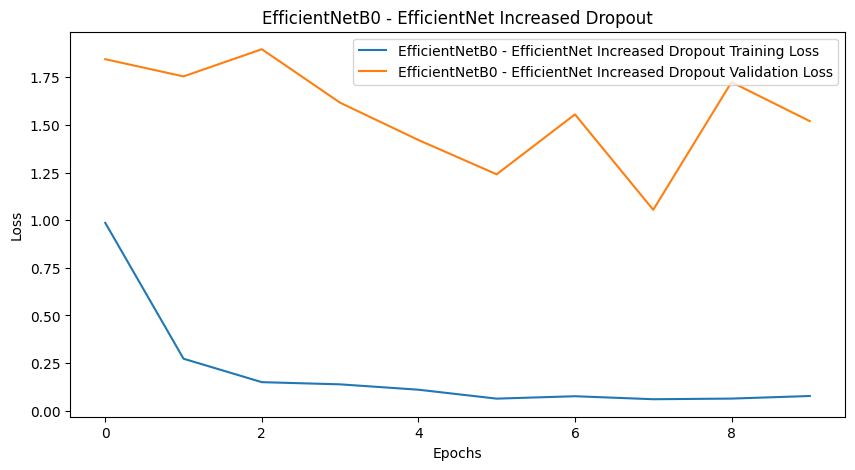

Epoch 1/10
34/34 [==============================] - 51s 678ms/step - loss: 0.8681 - accuracy: 0.7274 - val_loss: 1.2448 - val_accuracy: 0.5390
Epoch 2/10
34/34 [==============================] - 23s 670ms/step - loss: 0.1746 - accuracy: 0.9693 - val_loss: 0.5916 - val_accuracy: 0.8401
Epoch 3/10
34/34 [==============================] - 23s 681ms/step - loss: 0.1056 - accuracy: 0.9777 - val_loss: 1.2877 - val_accuracy: 0.4944
Epoch 4/10
34/34 [==============================] - 23s 676ms/step - loss: 0.0648 - accuracy: 0.9833 - val_loss: 1.7995 - val_accuracy: 0.4052
Epoch 5/10
34/34 [==============================] - 23s 669ms/step - loss: 0.0657 - accuracy: 0.9823 - val_loss: 1.1741 - val_accuracy: 0.5242
Epoch 6/10
34/34 [==============================] - 24s 683ms/step - loss: 0.0605 - accuracy: 0.9842 - val_loss: 1.3026 - val_accuracy: 0.5428
Epoch 7/10
34/34 [==============================] - 23s 670ms/step - loss: 0.0645 - accuracy: 0.9814 - val_loss: 1.6040 - val_accuracy: 0.3346

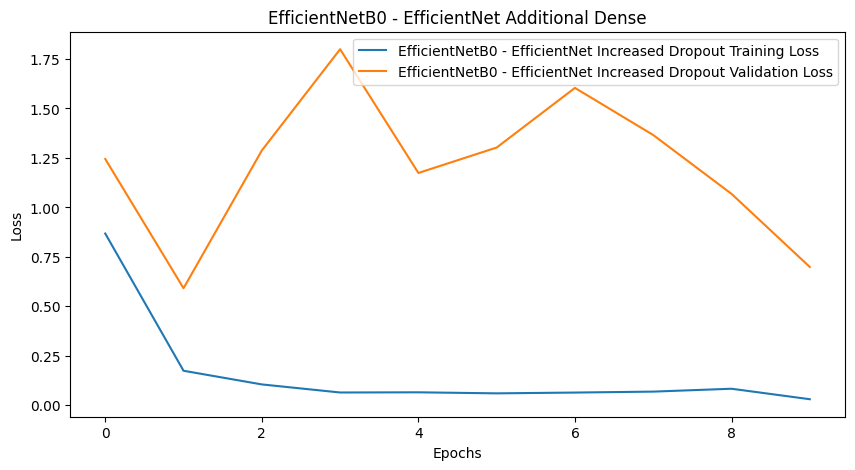

Epoch 1/10
34/34 [==============================] - 44s 688ms/step - loss: 0.6813 - accuracy: 0.8000 - val_loss: 0.4166 - val_accuracy: 0.8476
Epoch 2/10
34/34 [==============================] - 23s 664ms/step - loss: 0.2197 - accuracy: 0.9367 - val_loss: 0.1760 - val_accuracy: 0.9517
Epoch 3/10
34/34 [==============================] - 22s 656ms/step - loss: 0.1216 - accuracy: 0.9637 - val_loss: 0.1251 - val_accuracy: 0.9665
Epoch 4/10
34/34 [==============================] - 23s 676ms/step - loss: 0.1034 - accuracy: 0.9656 - val_loss: 0.1285 - val_accuracy: 0.9665
Epoch 5/10
34/34 [==============================] - 23s 676ms/step - loss: 0.1051 - accuracy: 0.9693 - val_loss: 0.1128 - val_accuracy: 0.9703
Epoch 6/10
34/34 [==============================] - 23s 668ms/step - loss: 0.0821 - accuracy: 0.9702 - val_loss: 0.1444 - val_accuracy: 0.9591
Epoch 7/10
34/34 [==============================] - 23s 677ms/step - loss: 0.0865 - accuracy: 0.9712 - val_loss: 0.1556 - val_accuracy: 0.9591

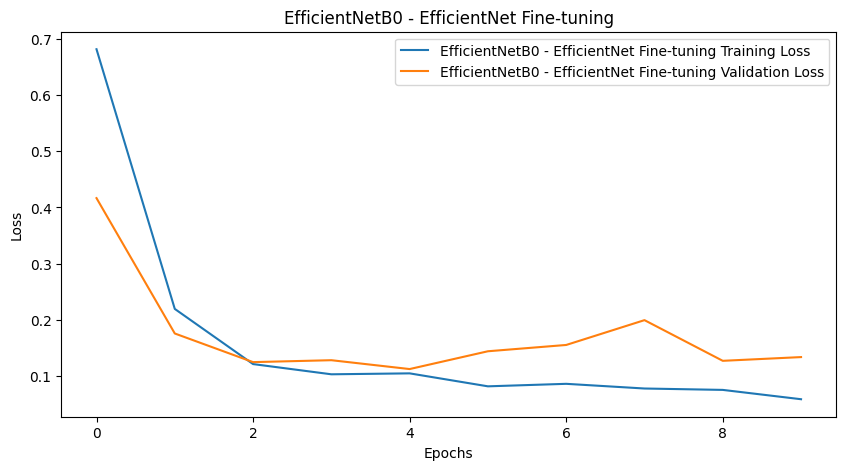

94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/10
34/34 [==============================] - 53s 717ms/step - loss: 1.0280 - accuracy: 0.6084 - val_loss: 5.9583 - val_accuracy: 0.1264
Epoch 2/10
34/34 [==============================] - 23s 669ms/step - loss: 0.2454 - accuracy: 0.9237 - val_loss: 3.7601 - val_accuracy: 0.1264
Epoch 3/10
34/34 [==============================] - 24s 687ms/step - loss: 0.1179 - accuracy: 0.9609 - val_loss: 4.2376 - val_accuracy: 0.1264
Epoch 4/10
34/34 [==============================] - 24s 693ms/step - loss: 0.1137 - accuracy: 0.9656 - val_loss: 7.5554 - val_accuracy: 0.1264
Epoch 5/10
34/34 [==============================] - 23s 686ms/step - loss: 0.0752 - accuracy: 0.9767 - val_loss: 2.8181 - val_accuracy: 0.1264
Epoch 6/10
34/34 [==============================] - 24s 690ms/step - loss: 0.0494 - accuracy: 0.9870 - val_loss: 2.5203 - val_accuracy: 0.1413
Epoch 7/10
34/34 [==============================] - 24s 701ms/step - loss: 0.

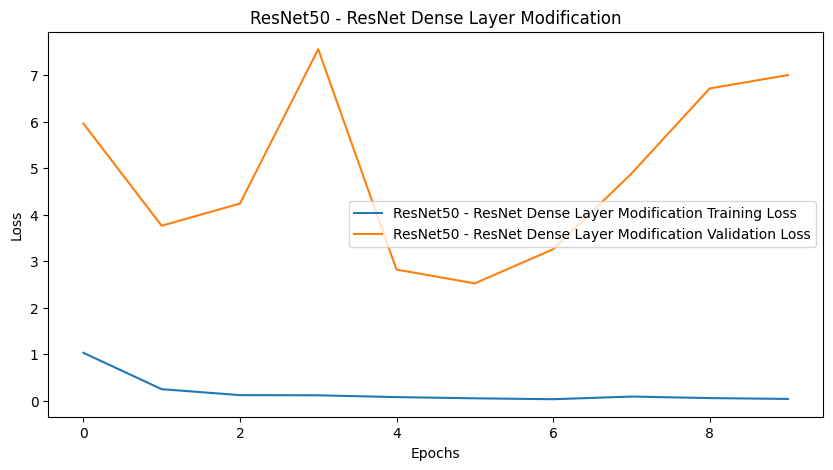

Epoch 1/10
34/34 [==============================] - 49s 668ms/step - loss: 0.4919 - accuracy: 0.8549 - val_loss: 11.2537 - val_accuracy: 0.1078
Epoch 2/10
34/34 [==============================] - 23s 664ms/step - loss: 0.1207 - accuracy: 0.9647 - val_loss: 13.1797 - val_accuracy: 0.1338
Epoch 3/10
34/34 [==============================] - 23s 671ms/step - loss: 0.0918 - accuracy: 0.9730 - val_loss: 10.1162 - val_accuracy: 0.1599
Epoch 4/10
34/34 [==============================] - 23s 659ms/step - loss: 0.0920 - accuracy: 0.9749 - val_loss: 19.4733 - val_accuracy: 0.1599
Epoch 5/10
34/34 [==============================] - 24s 686ms/step - loss: 0.0418 - accuracy: 0.9860 - val_loss: 15.1086 - val_accuracy: 0.1524
Epoch 6/10
34/34 [==============================] - 23s 685ms/step - loss: 0.0714 - accuracy: 0.9833 - val_loss: 30.1529 - val_accuracy: 0.1822
Epoch 7/10
34/34 [==============================] - 23s 667ms/step - loss: 0.0568 - accuracy: 0.9814 - val_loss: 42.6967 - val_accuracy:

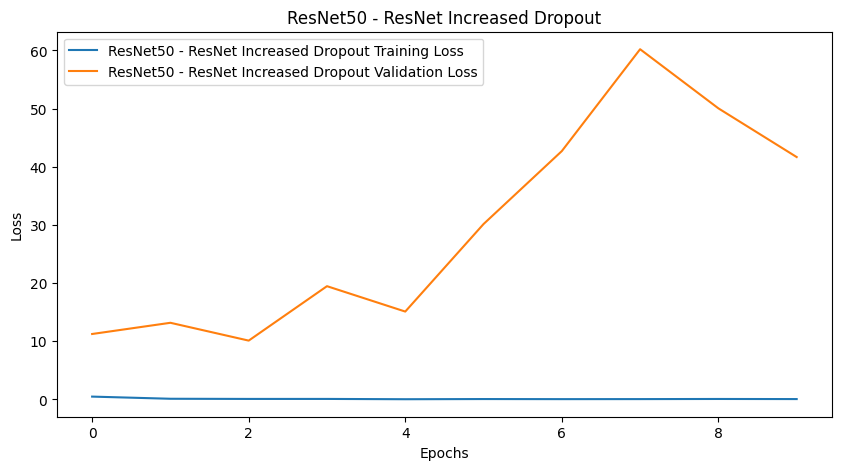

Epoch 1/10
34/34 [==============================] - 50s 689ms/step - loss: 0.5380 - accuracy: 0.8484 - val_loss: 16.5605 - val_accuracy: 0.2045
Epoch 2/10
34/34 [==============================] - 23s 685ms/step - loss: 0.1061 - accuracy: 0.9749 - val_loss: 11.5874 - val_accuracy: 0.2342
Epoch 3/10
34/34 [==============================] - 24s 698ms/step - loss: 0.0677 - accuracy: 0.9814 - val_loss: 13.2182 - val_accuracy: 0.2156
Epoch 4/10
34/34 [==============================] - 24s 683ms/step - loss: 0.1521 - accuracy: 0.9730 - val_loss: 19.8868 - val_accuracy: 0.2119
Epoch 5/10
34/34 [==============================] - 24s 695ms/step - loss: 0.1153 - accuracy: 0.9693 - val_loss: 13.7951 - val_accuracy: 0.3197
Epoch 6/10
34/34 [==============================] - 24s 679ms/step - loss: 0.0336 - accuracy: 0.9916 - val_loss: 13.2280 - val_accuracy: 0.3755
Epoch 7/10
34/34 [==============================] - 24s 688ms/step - loss: 0.0320 - accuracy: 0.9907 - val_loss: 8.9372 - val_accuracy: 

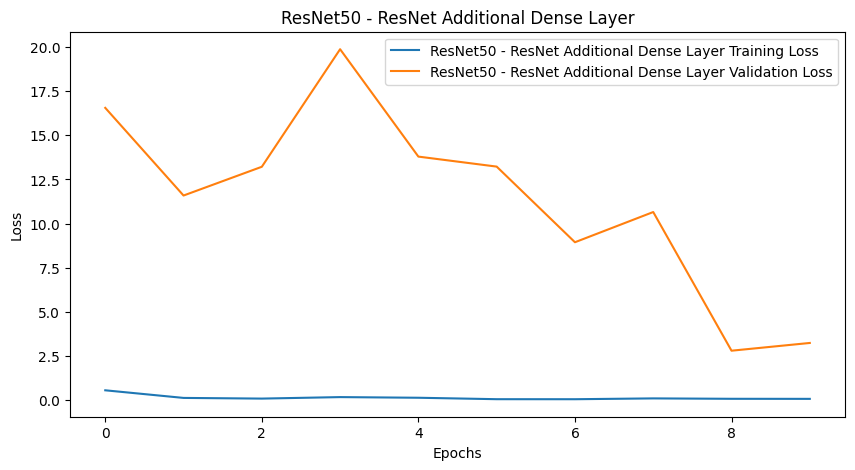

Epoch 1/10
34/34 [==============================] - 39s 704ms/step - loss: 0.2734 - accuracy: 0.9237 - val_loss: 0.2525 - val_accuracy: 0.9108
Epoch 2/10
34/34 [==============================] - 23s 662ms/step - loss: 0.0622 - accuracy: 0.9842 - val_loss: 0.2061 - val_accuracy: 0.9480
Epoch 3/10
34/34 [==============================] - 23s 670ms/step - loss: 0.0370 - accuracy: 0.9860 - val_loss: 0.0604 - val_accuracy: 0.9888
Epoch 4/10
34/34 [==============================] - 23s 677ms/step - loss: 0.0427 - accuracy: 0.9851 - val_loss: 0.0552 - val_accuracy: 0.9888
Epoch 5/10
34/34 [==============================] - 23s 671ms/step - loss: 0.0289 - accuracy: 0.9888 - val_loss: 0.1109 - val_accuracy: 0.9888
Epoch 6/10
34/34 [==============================] - 24s 687ms/step - loss: 0.0277 - accuracy: 0.9935 - val_loss: 0.1019 - val_accuracy: 0.9926
Epoch 7/10
34/34 [==============================] - 23s 677ms/step - loss: 0.0557 - accuracy: 0.9879 - val_loss: 0.1129 - val_accuracy: 0.9591

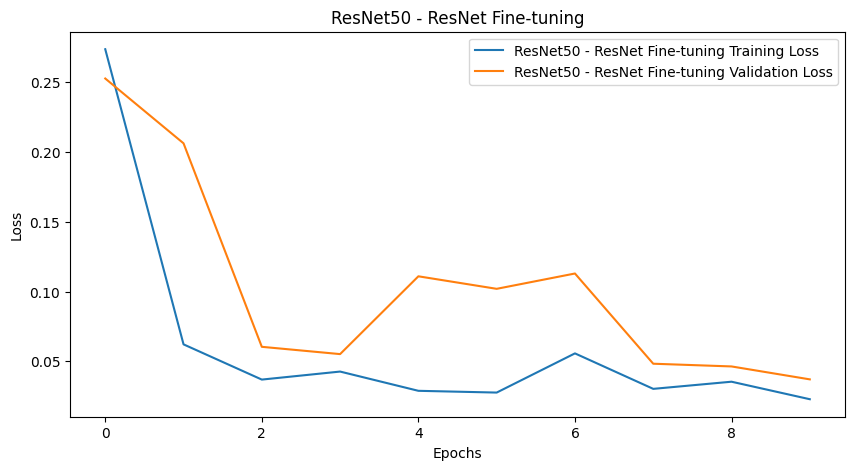

In [18]:
import pandas as pd

# Function to train and evaluate model
def train_evaluate_model(train_gen, val_gen, test_gen, model, epochs=10, learning_rate=1e-4):
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizers.Adam(learning_rate=learning_rate),
        metrics=['accuracy']
    )

    history = model.fit(
        train_gen,
        epochs=epochs,
        validation_data=val_gen
    )

    test_results = model.evaluate(test_gen)

    return history, test_results[1]  # Return history and test accuracy

# Experiment with VGG16
# Experiment tracking
experiment_logs = []  # To store experiment details

# Experiment 1: Base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_base = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

history, test_accuracy = train_evaluate_model(train_generator, validation_generator, test_generator, model_base)
experiment_logs.append({'Experiment': 'VGG16 - Base Model', 'Test Accuracy': test_accuracy, 'Model Variable Name': 'vgg16_base_model'})

model_base.save('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/vgg16_base_model', save_format='tf')

print("VGG16 - Base Model Test accuracy:", test_accuracy)

# Plot training and validation loss of base model
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='VGG16 - Base Model Training Loss')
plt.plot(history.history['val_loss'], label='VGG16 - Base Model Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG16 - Training and Validation Loss (Base Model)')
plt.legend()
plt.show()

# Experiment 2: Increased Dense Layers
model_exp2 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

history_exp2, test_accuracy_exp2 = train_evaluate_model(train_generator, validation_generator, test_generator, model_exp2)
experiment_logs.append({'Experiment': 'VGG16 - Increased Dense Layers', 'Test Accuracy': test_accuracy_exp2, 'Model Variable Name': 'vgg16_exp2'})

model_exp2.save('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/vgg16_exp2', save_format='tf')

print("VGG16 - Increased Dense Layers Test accuracy:", test_accuracy_exp2)

# Plot training and validation loss of model_exp2
plt.figure(figsize=(10, 5))
plt.plot(history_exp2.history['loss'], label='VGG16 - Increased Dense Layers Training Loss')
plt.plot(history_exp2.history['val_loss'], label='VGG16 - Increased Dense Layers Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG16 - Training and Validation Loss (Increased Dense Layers)')
plt.legend()
plt.show()

# Experiment 3: Additional Convolutional Layer
model_exp3 = models.Sequential([
    base_model,
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

history_exp3, test_accuracy_exp3 = train_evaluate_model(train_generator, validation_generator, test_generator, model_exp3)
experiment_logs.append({'Experiment': 'VGG16 - Additional Convolutional Layer', 'Test Accuracy': test_accuracy_exp3, 'Model Variable Name': 'vgg16_exp3'})

model_exp3.save('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/vgg16_exp3', save_format='tf')

print("VGG16 - Additional Convolutional Layer Test accuracy:", test_accuracy_exp3)

# Plot training and validation loss of model_exp3
plt.figure(figsize=(10, 5))
plt.plot(history_exp3.history['loss'], label='VGG16 - Additional Convolutional Layer Training Loss')
plt.plot(history_exp3.history['val_loss'], label='VGG16 - Additional Convolutional Layer Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG16 - Training and Validation Loss (Additional Convolutional Layer)')
plt.legend()
plt.show()

# Experiment 4: Transfer Learning without Freezing Layers
model_exp4 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

history_exp4, test_accuracy_exp4 = train_evaluate_model(train_generator, validation_generator, test_generator, model_exp4)
experiment_logs.append({'Experiment': 'VGG16 - Transfer Learning without Freezing Layers', 'Test Accuracy': test_accuracy_exp4, 'Model Variable Name': 'vgg16_exp4'})

model_exp4.save('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/vgg16_exp4', save_format='tf')

print("VGG16 - Transfer Learning without Freezing Layers Test accuracy:", test_accuracy_exp4)

# Plot training and validation loss of model_exp4
plt.figure(figsize=(10, 5))
plt.plot(history_exp4.history['loss'], label='VGG16 - Transfer Learning without Freezing Layers Training Loss')
plt.plot(history_exp4.history['val_loss'], label='VGG16 - Transfer Learning without Freezing Layers Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG16 - Training and Validation Loss (Transfer Learning without Freezing Layers)')
plt.legend()
plt.show()

# Experiment with EfficientNet
# Experiment 1: EfficientNet with Dense Layer Modification
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_exp1_efficientnet = models.Sequential([
    efficientnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

history_exp1_efficientnet, test_accuracy_exp1_efficientnet = train_evaluate_model(train_generator, validation_generator, test_generator, model_exp1_efficientnet)
experiment_logs.append({'Experiment': 'EfficientNetB0 - EfficientNet Dense Layer Modification', 'Test Accuracy': test_accuracy_exp1_efficientnet, 'Model Variable Name': 'efficientnet_exp1'})

model_exp1_efficientnet.save('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/efficientnet_exp1', save_format='tf')

print("EfficientNetB0 - EfficientNet Dense Layer Modification Test accuracy:", test_accuracy_exp1_efficientnet)

# Plot training and validation loss of efficientnet_exp1
plt.figure(figsize=(10, 5))
plt.plot(history_exp1_efficientnet.history['loss'], label='EfficientNetB0 - EfficientNet Dense Layer Modification Training Loss')
plt.plot(history_exp1_efficientnet.history['val_loss'], label='EfficientNetB0 - EfficientNet Dense Layer Modification Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('EfficientNetB0 - Training and Validation Loss (EfficientNet Dense Layer Modification)')
plt.legend()
plt.show()

# Experiment 2: EfficientNet with Increased Dropout
model_exp2_efficientnet = models.Sequential([
    efficientnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.7),  # Increased dropout
    layers.Dense(6, activation='softmax')
])

history_exp2_efficientnet, test_accuracy_exp2_efficientnet = train_evaluate_model(train_generator, validation_generator, test_generator, model_exp2_efficientnet)
experiment_logs.append({'Experiment': 'EfficientNetB0 - EfficientNet Increased Dropout', 'Test Accuracy': test_accuracy_exp2_efficientnet, 'Model Variable Name': 'efficientnet_exp2'})

model_exp2_efficientnet.save('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/efficientnet_exp2', save_format='tf')

print("EfficientNetB0 - EfficientNet Increased Dropout Test accuracy:", test_accuracy_exp2_efficientnet)

# Plot training and validation loss of efficientnet_exp2
plt.figure(figsize=(10, 5))
plt.plot(history_exp2_efficientnet.history['loss'], label='EfficientNetB0 - EfficientNet Increased Dropout Training Loss')
plt.plot(history_exp2_efficientnet.history['val_loss'], label='EfficientNetB0 - EfficientNet Increased Dropout Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('EfficientNetB0 - EfficientNet Increased Dropout')
plt.legend()
plt.show()

# Experiment 3: EfficientNet with Additional Dense Layer
model_exp3_efficientnet = models.Sequential([
    efficientnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),  # Additional dense layer
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

history_exp3_efficientnet, test_accuracy_exp3_efficientnet = train_evaluate_model(train_generator, validation_generator, test_generator, model_exp3_efficientnet)
experiment_logs.append({'Experiment': 'EfficientNetB0 - EfficientNet Additional Dense Layer', 'Test Accuracy': test_accuracy_exp3_efficientnet, 'Model Variable Name': 'efficientnet_exp3'})

model_exp3_efficientnet.save('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/efficientnet_exp3', save_format='tf')

print("EfficientNetB0 - EfficientNet Additional Dense Layer Test accuracy:", test_accuracy_exp3_efficientnet)

# Plot training and validation loss of efficientnet_exp2
plt.figure(figsize=(10, 5))
plt.plot(history_exp3_efficientnet.history['loss'], label='EfficientNetB0 - EfficientNet Increased Dropout Training Loss')
plt.plot(history_exp3_efficientnet.history['val_loss'], label='EfficientNetB0 - EfficientNet Increased Dropout Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('EfficientNetB0 - EfficientNet Additional Dense')
plt.legend()
plt.show()

# Experiment 4: EfficientNet with Fine-tuning
efficientnet_base.trainable = True

# Fine-tuning the model
fine_tune_at = len(efficientnet_base.layers) // 2  # Fine-tuning from the middle layers
for layer in efficientnet_base.layers[:fine_tune_at]:
    layer.trainable = False

model_exp4_efficientnet = models.Sequential([
    efficientnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

history_exp4_efficientnet, test_accuracy_exp4_efficientnet = train_evaluate_model(train_generator, validation_generator, test_generator, model_exp4_efficientnet)
experiment_logs.append({'Experiment': 'EfficientNetB0 - EfficientNet Fine-tuning', 'Test Accuracy': test_accuracy_exp4_efficientnet, 'Model Variable Name': 'efficientnet_exp4'})

model_exp4_efficientnet.save('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/efficientnet_exp4', save_format='tf')

print("EfficientNetB0 - EfficientNet Fine-tuning Test accuracy:", test_accuracy_exp4_efficientnet)

# Plot training and validation loss of efficientnet_exp2
plt.figure(figsize=(10, 5))
plt.plot(history_exp4_efficientnet.history['loss'], label='EfficientNetB0 - EfficientNet Fine-tuning Training Loss')
plt.plot(history_exp4_efficientnet.history['val_loss'], label='EfficientNetB0 - EfficientNet Fine-tuning Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('EfficientNetB0 - EfficientNet Fine-tuning')
plt.legend()
plt.show()

# Experiment with ResNet
# Experiment 1: ResNet with Dense Layer Modification
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_exp1_resnet = models.Sequential([
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

history_exp1_resnet, test_accuracy_exp1_resnet = train_evaluate_model(train_generator, validation_generator, test_generator, model_exp1_resnet)
experiment_logs.append({'Experiment': 'ResNet50 - ResNet Dense Layer Modification', 'Test Accuracy': test_accuracy_exp1_resnet, 'Model Variable Name': 'resnet_exp1'})

model_exp1_resnet.save('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/resnet_exp1', save_format='tf')

print("ResNet50 - ResNet Dense Layer Modification Test accuracy:", test_accuracy_exp1_resnet)

# Plot training and validation loss of efficientnet_exp2
plt.figure(figsize=(10, 5))
plt.plot(history_exp1_resnet.history['loss'], label='ResNet50 - ResNet Dense Layer Modification Training Loss')
plt.plot(history_exp1_resnet.history['val_loss'], label='ResNet50 - ResNet Dense Layer Modification Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ResNet50 - ResNet Dense Layer Modification')
plt.legend()
plt.show()

# Experiment 2: ResNet with Increased Dropout
model_exp2_resnet = models.Sequential([
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.7),  # Increased dropout
    layers.Dense(6, activation='softmax')
])

history_exp2_resnet, test_accuracy_exp2_resnet = train_evaluate_model(train_generator, validation_generator, test_generator, model_exp2_resnet)
experiment_logs.append({'Experiment': 'ResNet50 - ResNet Increased Dropout', 'Test Accuracy': test_accuracy_exp2_resnet, 'Model Variable Name': 'resnet_exp2'})

model_exp2_resnet.save('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/resnet_exp2', save_format='tf')

print("ResNet50 - ResNet Increased Dropout Test accuracy:", test_accuracy_exp2_resnet)

# Plot training and validation loss of efficientnet_exp2
plt.figure(figsize=(10, 5))
plt.plot(history_exp2_resnet.history['loss'], label='ResNet50 - ResNet Increased Dropout Training Loss')
plt.plot(history_exp2_resnet.history['val_loss'], label='ResNet50 - ResNet Increased Dropout Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ResNet50 - ResNet Increased Dropout')
plt.legend()
plt.show()

# Experiment 3: ResNet with Additional Dense Layer
model_exp3_resnet = models.Sequential([
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),  # Additional dense layer
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

history_exp3_resnet, test_accuracy_exp3_resnet = train_evaluate_model(train_generator, validation_generator, test_generator, model_exp3_resnet)
experiment_logs.append({'Experiment': 'ResNet50 - ResNet Additional Dense Layer', 'Test Accuracy': test_accuracy_exp3_resnet, 'Model Variable Name': 'resnet_exp3'})

model_exp3_resnet.save('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/resnet_exp3', save_format='tf')

print("ResNet50 - ResNet Additional Dense Layer Test accuracy:", test_accuracy_exp3_resnet)

# Plot training and validation loss of efficientnet_exp2
plt.figure(figsize=(10, 5))
plt.plot(history_exp3_resnet.history['loss'], label='ResNet50 - ResNet Additional Dense Layer Training Loss')
plt.plot(history_exp3_resnet.history['val_loss'], label='ResNet50 - ResNet Additional Dense Layer Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ResNet50 - ResNet Additional Dense Layer')
plt.legend()
plt.show()

# Experiment 4: ResNet with Fine-tuning
resnet_base.trainable = True

# Fine-tuning the model
fine_tune_at = len(resnet_base.layers) // 2  # Fine-tuning from the middle layers
for layer in resnet_base.layers[:fine_tune_at]:
    layer.trainable = False

model_exp4_resnet = models.Sequential([
    resnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

history_exp4_resnet, test_accuracy_exp4_resnet = train_evaluate_model(train_generator, validation_generator, test_generator, model_exp4_resnet)
experiment_logs.append({'Experiment': 'ResNet50 - ResNet Fine-tuning', 'Test Accuracy': test_accuracy_exp4_resnet, 'Model Variable Name': 'resnet_exp4'})

model_exp4_resnet.save('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/resnet_exp4', save_format='tf')

print("ResNet50 - ResNet Fine-tuning Test accuracy:", test_accuracy_exp4_resnet)

# Plot training and validation loss of efficientnet_exp2
plt.figure(figsize=(10, 5))
plt.plot(history_exp4_resnet.history['loss'], label='ResNet50 - ResNet Fine-tuning Training Loss')
plt.plot(history_exp4_resnet.history['val_loss'], label='ResNet50 - ResNet Fine-tuning Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ResNet50 - ResNet Fine-tuning')
plt.legend()
plt.show()


# Save experiment details to a CSV file
experiment_df = pd.DataFrame(experiment_logs)
experiment_df.to_csv('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/experiment_logs.csv', index=False)


# Visualize experiments

In [19]:
import pandas as pd

# Convert experiment_logs to a DataFrame
experiment_df = pd.DataFrame(experiment_logs, columns=['Experiment', 'Test Accuracy', 'Model Variable Name'])

# Display experiment logs as a table in a notebook
display(experiment_df)  # For Jupyter Notebook or Colab

# Save experiment logs as a new CSV file
experiment_df.to_csv('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/experiment_logs.csv', index=False)


Experiment  Test Accuracy  \
0                                  VGG16 - Base Model       0.949405   
1                      VGG16 - Increased Dense Layers       0.913690   
2              VGG16 - Additional Convolutional Layer       0.925595   
3   VGG16 - Transfer Learning without Freezing Layers       0.961310   
4   EfficientNetB0 - EfficientNet Dense Layer Modi...       0.369048   
5     EfficientNetB0 - EfficientNet Increased Dropout       0.497024   
6   EfficientNetB0 - EfficientNet Additional Dense...       0.782738   
7           EfficientNetB0 - EfficientNet Fine-tuning       0.949405   
8          ResNet50 - ResNet Dense Layer Modification       0.142857   
9                 ResNet50 - ResNet Increased Dropout       0.136905   
10           ResNet50 - ResNet Additional Dense Layer       0.619048   
11                      ResNet50 - ResNet Fine-tuning       0.991071   

   Model Variable Name  
0     vgg16_base_model  
1           vgg16_exp2  
2           vgg16_exp3  
3           vgg16_exp4  
4    efficientnet_exp1  
5    efficientnet_exp2  
6    efficientnet_exp3  
7    efficientnet_exp4  
8          resnet_exp1  
9          resnet_exp2  
10         resnet_exp3  
11         resnet_exp4

# Plot Actual vs. Predicted Labels on a Subset of Train Data

In [20]:
!pip install ImageHash

In [21]:
# Assuming 'train_generator' is your generator
class_indices = train_generator.class_indices
print("Class Indices:", class_indices)

class_labels = {v: k for k, v in class_indices.items()}
print("Class Labels:", class_labels)

Class Indices: {'blurred': 0, 'camera_shake': 1, 'distorted': 2, 'original': 3, 'overexposed': 4, 'underexposed': 5}
Class Labels: {0: 'blurred', 1: 'camera_shake', 2: 'distorted', 3: 'original', 4: 'overexposed', 5: 'underexposed'}


best_experiment  Experiment             ResNet50 - ResNet Fine-tuning
Test Accuracy                               0.991071
Model Variable Name                      resnet_exp4
Name: 11, dtype: object
Found 25 validated image filenames belonging to 6 classes.
5/5 [==============================] - 12s 3s/step


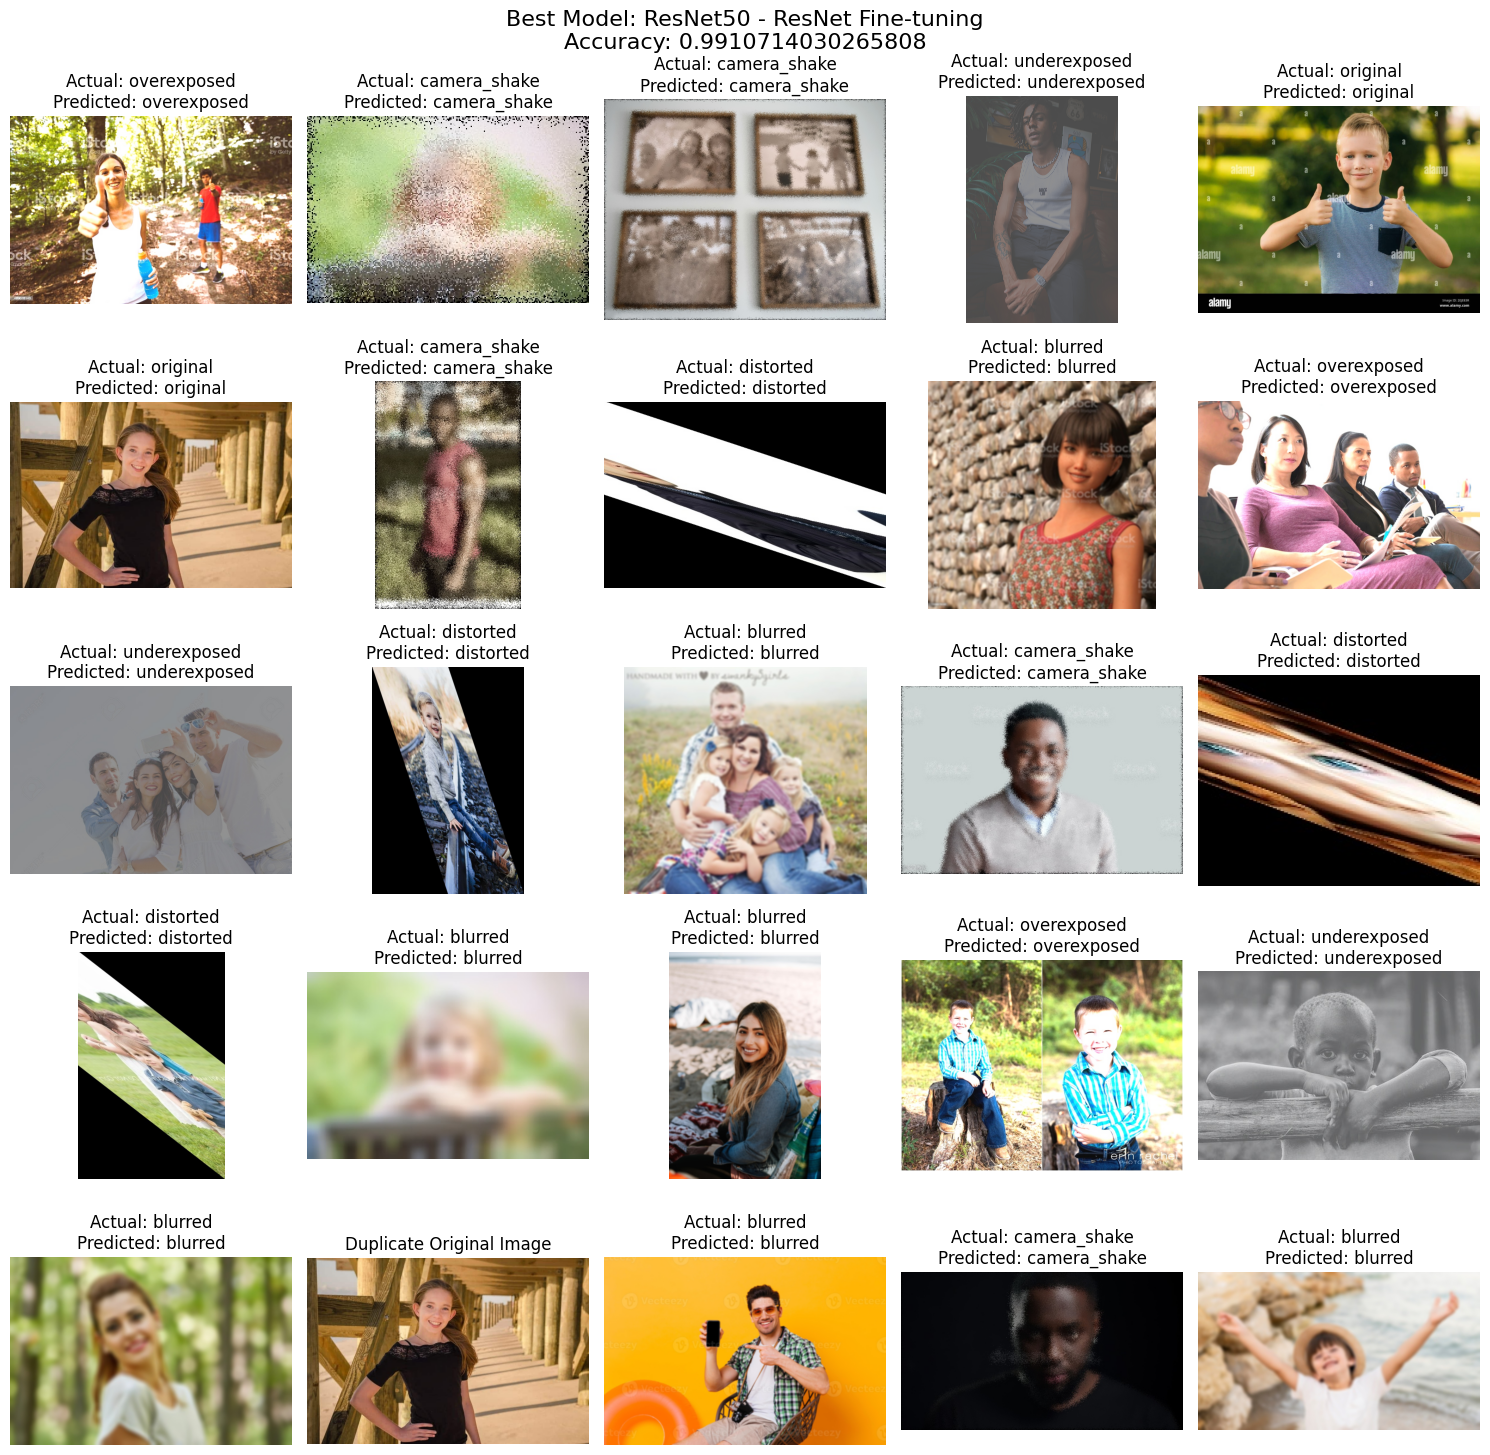

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import imagehash
import os

# Load experiment logs CSV
experiment_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/experiment_logs.csv')

# Define the index corresponding to the 'original' label in your dataset
original_label_index = 3  # Update this index based on your dataset label encoding

# Path to the test dataset folder containing CSV file with image paths
test_dataset_folder = '/content/drive/MyDrive/Colab Notebooks/test_dataset/'

# Load the CSV file containing paths to test images
test_csv_path = os.path.join(test_dataset_folder, 'test_dataset.csv')
test_df = pd.read_csv(test_csv_path)

# Select a random subset of 25 images from the test set for prediction and display
subset_df = test_df.sample(n=25, random_state=np.random.randint(100))  # Select 25 random samples for display

# Fetch the best model's variable name from the experiment logs
best_experiment = experiment_df.loc[experiment_df['Test Accuracy'].idxmax()]

print("best_experiment ", best_experiment)

best_model_path = f"/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/{best_experiment['Model Variable Name']}"
best_model = models.load_model(best_model_path)

# Get the accuracy of the best model
best_model_accuracy = best_experiment['Test Accuracy']

# Create a set to store original image hashes
original_image_hashes = set()

# Predict labels for the subset of test data using the best model
subset_generator = test_datagen.flow_from_dataframe(
    subset_df,
    x_col='X',
    y_col='Y',
    target_size=img_size,
    batch_size=5,
    class_mode='categorical',
    shuffle=False
)
predictions = best_model.predict(subset_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Plot actual vs. predicted labels for the subset of test data using the best model
plt.figure(figsize=(15, 15))
plt.suptitle(f"Best Model: {best_experiment['Experiment']}\nAccuracy: {best_model_accuracy}", fontsize=16)  # Add model info to plot title
for i in range(25):
    img_path = subset_df.iloc[i]['X']
    img = Image.open(img_path)

    # Check if the label is original after prediction
    if predicted_labels[i] == original_label_index:  # Change 'original_label_index' to the index of the 'original' label
        img_hash = str(imagehash.average_hash(img))  # Convert the hash to a string

        # Check for duplicates only among original labeled images
        if img_hash in original_image_hashes:
            plt.subplot(5, 5, i + 1)
            plt.imshow(img)  # Display the duplicate original image
            plt.title("Duplicate Original Image")  # Mark as Duplicate Original Image
            plt.axis('off')
            continue
        else:
            original_image_hashes.add(img_hash)  # Store the hash for comparison

    plt.subplot(5, 5, i + 1)
    img = plt.imread(img_path)
    plt.imshow(img)
    actual_label = subset_df.iloc[i]['Y']
    predicted_label = class_labels[predicted_labels[i]]
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Custom Image Prediction

In [27]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.2 MB/s eta 0:00:00


In [45]:
from io import BytesIO
from PIL import Image as PILImage
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import time

# Define the target size for uploaded images
upload_img_size = (224, 224)

# Function to handle file upload
def on_upload(change):
    uploaded_filename = list(upload_btn.value.keys())[0]
    content = upload_btn.value[uploaded_filename]['content']
    img = PILImage.open(BytesIO(content))
    img = img.resize(upload_img_size)
    img = np.array(img)
    img = PILImage.fromarray(img.astype('uint8'))  # Convert back to PIL image
    bio = BytesIO()
    img.save(bio, format='jpeg')
    uploaded_image.value = bio.getvalue()
    process_image()

# Function to process and display the uploaded image
def process_image():
    with output_image:
        clear_output(wait=True)
        progress_label.value = 'Processing...'
        time.sleep(1)  # Simulate processing time
        output_image.clear_output()
        plt.figure(figsize=(4, 4))
        img_array = np.array(PILImage.open(BytesIO(uploaded_image.value)))
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        prediction = best_model.predict(img_array)
        predicted_label = class_labels[np.argmax(prediction)]
        plt.imshow(img_array[0])
        plt.title(f"Predicted Label: {predicted_label}")
        plt.axis('off')
        plt.show()
        progress_label.value = 'Processed!'

# Function to reset uploaded image and plot
def reset_image(_):
    uploaded_image.value = None
    output_image.clear_output()
    progress_label.value = ''

# Create upload button
upload_btn = widgets.FileUpload(accept='.jpg,.jpeg,.png')
upload_btn.observe(on_upload, names='_counter')

# Create output widget for displaying images
uploaded_image = widgets.Image(format='jpeg', width=300, height=300)

# Create output widget for displaying processed images
output_image = widgets.Output()

# Create label for progress indication
progress_label = widgets.Label()

# Create reset button
reset_btn = widgets.Button(description="Reset")
reset_btn.on_click(reset_image)

# Display widgets in a vertical box
display(widgets.VBox([upload_btn, progress_label, uploaded_image, output_image, reset_btn]))


# Download the Model and Labels

In [48]:
# Save the model
best_model.save('/content/best_model')

# Save class labels and accuracy
import pickle

with open('/content/class_labels.pkl', 'wb') as file:
    pickle.dump(class_labels, file)


In [52]:
import tensorflow as tf

# Load the SavedModel
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/resnet_exp4')

# Save as .h5 file
loaded_model.save('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/resnet_exp4.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
from google.colab import files

# Download the files
files.download('/content/drive/MyDrive/Colab Notebooks/image_dataset_updated/resnet_exp4.h5')
# files.download('/content/class_labels.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>